In [6]:
# Automating the creation of test data paths
def generate_file_paths(base_path, file_name_pattern, start, end, extension):
    """
    Generates a list of file paths with a specified pattern.
    
    Args:
    - base_path (str): The base directory path.
    - file_name_pattern (str): The pattern of the file name with placeholders for numbering.
    - start (int): The starting number for file names.
    - end (int): The ending number for file names.
    - extension (str): The file extension.
    
    Returns:
    - List of file paths.
    """
    return [f"{base_path}/{file_name_pattern.format(str(i).zfill(4))}.{extension}" for i in range(start, end + 1)]

# Automating GIF files
sample_gif_files = [
    f"input_data/sample_gif/SampleGIFImage_{size}kbmb.gif"
    for size in [40, 135, 350]
]

# Automating JPG files
sample_jpg_files = [
    f"input_data/sample_jpg/SampleJPGImage_{size}mbmb.jpg"
    for size in [1, 2, 5, 10, 15, 20, 30]
] + [
    f"input_data/sample_jpg/SampleJPGImage_{size}kbmb.jpg"
    for size in [50, 100, 200, 500]
]

# Automating PDF files
sample_pdf_files = [f"input_data/sample_pdf/SamplePDFFile_{size}mb.pdf" for size in [5]]

# Automating PNG files
sample_png_files = [
    f"input_data/sample_png/SamplePNGImage_{size}mbmb.png"
    for size in [1, 3, 5, 10, 20, 30]
] + [
    f"input_data/sample_png/SamplePNGImage_{size}kbmb.png"
    for size in [100, 200, 500]
]

# Automating PPT files
sample_ppt_files = [
    f"input_data/sample_ppt/SamplePPTFile_{size}kb.ppt"
    for size in [500, 1000]
]

# Automating Text files
sample_text_files = [
    f"input_data/sample_text/text_{size}.txt"
    for size in [10, 100, 1000, 10000, 100000, 1000000, 10000000]
]

# Automating Video files
video_resolutions = ['360x240', '640x360', '720x480', '1280x720']
video_sizes = [1, 2, 5, 10, 20, 30]
sample_video_files = [
    f"input_data/sample_video/SampleVideo_{res}_{size}mb.mp4"
    for res in video_resolutions
    for size in video_sizes
]

# Automating ZIP files
sample_zip_files = [
    f"input_data/sample_zip/SampleZIPFile_{size}mbmb.zip"
    for size in [10, 20, 30, 50, 100]
]

# Automating Vectors
vectors = generate_file_paths(
    base_path="input_data/vectors",
    file_name_pattern="byte{}",
    start=0,
    end=195,
    extension="dat"
)

In [7]:
import hashlib
import os
import math
import pandas as pd

# Define the hashing algorithms to test
hashing_algorithms = {
    "MD5": hashlib.md5,
    "SHA-1": hashlib.sha1,
    "SHA-256": hashlib.sha256,
    "SHA3-256": hashlib.sha3_256,
    "Blake2b": hashlib.blake2b
}

# Function to calculate entropy of a hash output
def calculate_entropy(data):
    """
    Calculates the Shannon entropy of the given data.
    """
    if not data:
        return 0
    frequency = {}
    for byte in data:
        frequency[byte] = frequency.get(byte, 0) + 1
    total_bytes = len(data)
    entropy = -sum((freq / total_bytes) * math.log2(freq / total_bytes) for freq in frequency.values())
    return entropy

# Function to hash a file with the given algorithm
def hash_file(file_path, algorithm):
    """
    Hashes the contents of a file using the specified algorithm.
    """
    hasher = algorithm()
    with open(file_path, 'rb') as file:
        while chunk := file.read(8192):  # Read file in chunks
            hasher.update(chunk)
    return hasher.digest()

# Automate vector file generation
def generate_file_paths(base_path, file_name_pattern, start, end, extension):
    """
    Generates a list of file paths with a specified pattern.
    """
    return [f"{base_path}/{file_name_pattern.format(str(i).zfill(4))}.{extension}" for i in range(start, end + 1)]

# Generate file paths for the vectors
vectors = generate_file_paths(
    base_path="input_data/vectors",
    file_name_pattern="byte{}",
    start=0,
    end=195,
    extension="dat"
)

# Initialize a list to store the results
results = []

# Perform hashing and entropy tests
for file_path in vectors:
    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
        continue
    for algo_name, algo_func in hashing_algorithms.items():
        hash_output = hash_file(file_path, algo_func)
        entropy = calculate_entropy(hash_output)
        results.append({
            "File": os.path.basename(file_path),
            "Algorithm": algo_name,
            "Hash": hash_output.hex(),
            "Entropy": entropy
        })

# Store results in a DataFrame for analysis
df = pd.DataFrame(results)

# Group by algorithm and calculate the average entropy for each algorithm
grouped_df = df.groupby("Algorithm").mean(numeric_only=True)["Entropy"].reset_index()
grouped_df.rename(columns={"Entropy": "Average Entropy"}, inplace=True)

# Save to CSV for later use (optional)
output_csv = "hash_entropy_results.csv"
df.to_csv(output_csv, index=False)

# Save the average entropy DataFrame to another CSV (optional)
average_entropy_csv = "average_entropy_results.csv"
grouped_df.to_csv(average_entropy_csv, index=False)


In [8]:
df.head(10)

,File,Algorithm,Hash,Entropy
0,byte0000.dat,MD5,d41d8cd98f00b204e9800998ecf8427e,4.000000
1,byte0000.dat,SHA-1,da39a3ee5e6b4b0d3255bfef95601890afd80709,4.321928
2,byte0000.dat,SHA-256,e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b93...,4.937500
3,byte0000.dat,SHA3-256,a7ffc6f8bf1ed76651c14756a061d662f580ff4de43b49...,4.812500
4,byte0000.dat,Blake2b,786a02f742015903c6c6fd852552d272912f4740e15847...,5.812500
5,byte0001.dat,MD5,c3e97dd6e97fb5125688c97f36720cbe,3.750000
6,byte0001.dat,SHA-1,3cdf2936da2fc556bfa533ab1eb59ce710ac80e5,4.321928
7,byte0001.dat,SHA-256,09fc96082d34c2dfc1295d92073b5ea1dc8ef8da95f14d...,4.937500
8,byte0001.dat,SHA3-256,5ecdbae446010644dd235353f132c03fa21a1e6020a86e...,4.875000
9,byte0001.dat,Blake2b,388a507aa909e01f549b7fd8e6094b0438e8a1ecc4db0d...,5.738205


In [9]:
grouped_df.head(10)

,Algorithm,Average Entropy
0,Blake2b,5.763810
1,MD5,3.941964
2,SHA-1,4.238822
3,SHA-256,4.888266
4,SHA3-256,4.866534


In [10]:
import hashlib
import os
import pandas as pd
import numpy as np

# Define the hashing algorithms to test
hashing_algorithms = {
    "MD5": hashlib.md5,
    "SHA-1": hashlib.sha1,
    "SHA-256": hashlib.sha256,
    "SHA3-256": hashlib.sha3_256,
    "Blake2b": hashlib.blake2b
}

# Function to hash a file with the given algorithm
def hash_file(file_path, algorithm):
    """
    Hashes the contents of a file using the specified algorithm.
    """
    hasher = algorithm()
    with open(file_path, 'rb') as file:
        while chunk := file.read(8192):  # Read file in chunks
            hasher.update(chunk)
    return hasher.digest()

# Function to calculate byte frequencies
def calculate_byte_frequencies(hash_output):
    """
    Calculates the frequency of each byte (0-255) in the hash output.
    """
    frequencies = np.zeros(256, dtype=int)  # Initialize an array for byte frequencies
    for byte in hash_output:
        frequencies[byte] += 1
    return frequencies

# Combine all file paths (replace with your full file list if needed)
all_files = vectors  # Use the vector paths or other file groups

# Initialize a list to store results
uniform_results = []

# Perform uniform distribution tests
for file_path in all_files:
    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
        continue
    for algo_name, algo_func in hashing_algorithms.items():
        hash_output = hash_file(file_path, algo_func)
        byte_frequencies = calculate_byte_frequencies(hash_output)
        # Measure uniformity: standard deviation of frequencies (lower is better)
        std_dev = np.std(byte_frequencies)
        uniform_results.append({
            "File": os.path.basename(file_path),
            "Algorithm": algo_name,
            "Standard Deviation": std_dev
        })

# Store results in a DataFrame for analysis
uniform_df = pd.DataFrame(uniform_results)

# Group by algorithm to calculate average standard deviation for each algorithm
uniform_summary = uniform_df.groupby("Algorithm").mean(numeric_only=True)["Standard Deviation"].reset_index()
uniform_summary.rename(columns={"Standard Deviation": "Average Standard Deviation"}, inplace=True)

# Save results to CSV for later analysis (optional)
uniform_df.to_csv("hash_uniformity_results.csv", index=False)
uniform_summary.to_csv("average_uniformity_results.csv", index=False)


In [11]:
uniform_df.head(10)

,File,Algorithm,Standard Deviation
0,byte0000.dat,MD5,0.242061
1,byte0000.dat,SHA-1,0.268368
2,byte0000.dat,SHA-256,0.342327
3,byte0000.dat,SHA3-256,0.364434
4,byte0000.dat,Blake2b,0.484123
5,byte0001.dat,MD5,0.272431
6,byte0001.dat,SHA-1,0.268368
7,byte0001.dat,SHA-256,0.342327
8,byte0001.dat,SHA3-256,0.353553
9,byte0001.dat,Blake2b,0.507752


In [12]:
uniform_summary.head(10)

,Algorithm,Average Standard Deviation
0,Blake2b,0.499340
1,MD5,0.249218
2,SHA-1,0.280106
3,SHA-256,0.351211
4,SHA3-256,0.355463


In [13]:
import hashlib
import os
import pandas as pd

# Define the hashing algorithms to test
hashing_algorithms = {
    "MD5": hashlib.md5,
    "SHA-1": hashlib.sha1,
    "SHA-256": hashlib.sha256,
    "SHA3-256": hashlib.sha3_256,
    "Blake2b": hashlib.blake2b
}

# Function to hash data with the given algorithm
def hash_data(data, algorithm):
    """
    Hashes the given data using the specified algorithm.
    """
    hasher = algorithm()
    hasher.update(data)
    return hasher.digest()  # Return as raw bytes for bit comparison

# Function to flip a specific bit in a byte sequence
def flip_bit(data, bit_index):
    """
    Flips a single bit in a byte sequence at the specified bit index.
    """
    if len(data) == 0:
        raise ValueError("Cannot flip a bit in an empty input.")
    
    byte_index = bit_index // 8
    if byte_index >= len(data):
        raise ValueError(f"bit_index {bit_index} is out of range for the input data of length {len(data) * 8} bits.")
    
    bit_in_byte = bit_index % 8
    modified_data = bytearray(data)
    modified_data[byte_index] ^= (1 << bit_in_byte)
    return bytes(modified_data)

# Function to calculate the percentage of bits that changed
def calculate_bit_difference(hash1, hash2):
    """
    Calculates the percentage of bits that differ between two hash outputs.
    """
    if len(hash1) != len(hash2):
        raise ValueError("Hashes must be the same length for comparison.")
    bit_diff = sum(bin(byte1 ^ byte2).count('1') for byte1, byte2 in zip(hash1, hash2))
    total_bits = len(hash1) * 8
    return (bit_diff / total_bits) * 100

# Combine all file paths (use vectors or other file groups as needed)
all_files = vectors  # Example: using the previously defined vector file paths

# Initialize a list to store results
avalanche_results = []

# Perform avalanche effect test
for file_path in all_files:
    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
        continue
    with open(file_path, 'rb') as file:
        original_data = file.read()
    
    # Skip empty files
    if len(original_data) == 0:
        print(f"Skipping empty file: {file_path}")
        continue
    
    # Test each algorithm
    for algo_name, algo_func in hashing_algorithms.items():
        # Hash the original data
        original_hash = hash_data(original_data, algo_func)
        
        # Flip a single bit in the input data
        try:
            flipped_data = flip_bit(original_data, 0)  # Flip the first bit (index 0)
            flipped_hash = hash_data(flipped_data, algo_func)
            
            # Calculate bit difference
            bit_diff_percentage = calculate_bit_difference(original_hash, flipped_hash)
            
            # Store results
            avalanche_results.append({
                "File": os.path.basename(file_path),
                "Algorithm": algo_name,
                "Bit Difference (%)": bit_diff_percentage
            })
        except ValueError as e:
            print(f"Error processing file {file_path} with algorithm {algo_name}: {e}")

# Store results in a DataFrame
avalanche_df = pd.DataFrame(avalanche_results)

# Calculate average bit difference for each algorithm
avalanche_summary = avalanche_df.groupby("Algorithm").mean(numeric_only=True).reset_index()
avalanche_summary.rename(columns={"Bit Difference (%)": "Average Bit Difference (%)"}, inplace=True)

# Save results to CSV for later use (optional)
avalanche_df.to_csv("avalanche_effect_results.csv", index=False)
avalanche_summary.to_csv("avalanche_effect_summary.csv", index=False)

Skipping empty file: input_data/vectors/byte0000.dat


In [14]:
avalanche_df.head(10)

,File,Algorithm,Bit Difference (%)
0,byte0001.dat,MD5,46.093750
1,byte0001.dat,SHA-1,58.125000
2,byte0001.dat,SHA-256,55.078125
3,byte0001.dat,SHA3-256,46.875000
4,byte0001.dat,Blake2b,50.000000
5,byte0002.dat,MD5,48.437500
6,byte0002.dat,SHA-1,51.250000
7,byte0002.dat,SHA-256,48.828125
8,byte0002.dat,SHA3-256,46.093750
9,byte0002.dat,Blake2b,49.804688


In [15]:
avalanche_summary.head(10)

,Algorithm,Average Bit Difference (%)
0,Blake2b,49.942909
1,MD5,49.627404
2,SHA-1,50.016026
3,SHA-256,50.036058
4,SHA3-256,50.050080


In [16]:
import hashlib
import random
import string
import pandas as pd

# Define the hashing algorithms to test
hashing_algorithms = {
    "MD5": hashlib.md5,
    "SHA-1": hashlib.sha1,
    "SHA-256": hashlib.sha256,
    "SHA3-256": hashlib.sha3_256,
    "Blake2b": hashlib.blake2b
}

# Function to generate a random string
def generate_random_string(length=64):
    """
    Generates a random string of the specified length.
    """
    return ''.join(random.choices(string.ascii_letters + string.digits, k=length))

# Function to flip a specific bit in a string
def flip_bit_in_string(data, bit_index):
    """
    Flips a single bit in a string's binary representation.
    """
    byte_index = bit_index // 8
    bit_in_byte = bit_index % 8
    modified_data = bytearray(data.encode('utf-8'))
    if byte_index < len(modified_data):
        modified_data[byte_index] ^= (1 << bit_in_byte)
    return modified_data.decode('utf-8', errors='ignore')

# Function to calculate the percentage of bits that changed
def calculate_bit_difference(hash1, hash2):
    """
    Calculates the percentage of bits that differ between two hash outputs.
    """
    if len(hash1) != len(hash2):
        raise ValueError("Hashes must be the same length for comparison.")
    bit_diff = sum(bin(byte1 ^ byte2).count('1') for byte1, byte2 in zip(hash1, hash2))
    total_bits = len(hash1) * 8
    return (bit_diff / total_bits) * 100

# Function to hash data using a specified algorithm
def hash_data(data, algorithm):
    """
    Hashes the given data using the specified algorithm.
    """
    hasher = algorithm()
    hasher.update(data.encode('utf-8'))
    return hasher.digest()

# Parameters for the test
num_samples = 10000  # Number of random strings to generate
string_length = 128  # Length of each random string

# Initialize a list to store results
avalanche_results = []

# Perform the avalanche effect test
for _ in range(num_samples):
    original_string = generate_random_string(string_length)
    
    # Test each algorithm
    for algo_name, algo_func in hashing_algorithms.items():
        # Hash the original string
        original_hash = hash_data(original_string, algo_func)
        
        # Flip a single bit in the string
        flipped_string = flip_bit_in_string(original_string, 0)  # Flip the first bit
        flipped_hash = hash_data(flipped_string, algo_func)
        
        # Calculate bit difference
        bit_diff_percentage = calculate_bit_difference(original_hash, flipped_hash)
        
        # Store results
        avalanche_results.append({
            "Original String": original_string,
            "Algorithm": algo_name,
            "Bit Difference (%)": bit_diff_percentage
        })

# Store results in a DataFrame
avalanche_df = pd.DataFrame(avalanche_results)

# Calculate average bit difference for each algorithm
avalanche_summary = avalanche_df.groupby("Algorithm").mean(numeric_only=True).reset_index()
avalanche_summary.rename(columns={"Bit Difference (%)": "Average Bit Difference (%)"}, inplace=True)

# Save results to CSV for later use (optional)
avalanche_df.to_csv("random_strings_avalanche_effect_results.csv", index=False)
avalanche_summary.to_csv("random_strings_avalanche_effect_summary.csv", index=False)

avalanche_df.head(10)
avalanche_summary.head(10)

,Algorithm,Average Bit Difference (%)
0,Blake2b,49.983164
1,MD5,49.929297
2,SHA-1,49.977187
3,SHA-256,50.032539
4,SHA3-256,49.958047


In [41]:
import hashlib
import random
import string
import pandas as pd
import math

# Define hashing algorithms
hashing_algorithms = {
    "MD5": hashlib.md5,
    "SHA-1": hashlib.sha1,
    "SHA-256": hashlib.sha256,
    "SHA3-256": hashlib.sha3_256,
    "Blake2b": hashlib.blake2b
}

# Generate a random string
def generate_random_string(length=64):
    return ''.join(random.choices(string.ascii_letters + string.digits, k=length))

# Truncate hash function
def truncated_hash(data, algorithm, bits=16):
    hasher = algorithm()
    hasher.update(data.encode('utf-8'))
    full_hash = hasher.digest()
    truncated_bytes = bits // 8
    return full_hash[:truncated_bytes].hex()

# Theoretical collision probability
def theoretical_collision_probability(n, b):
    return 1 - math.exp(-n * (n - 1) / (2 * (2 ** b)))

# Parameters
num_samples = 1_000_000  # You can gradually increase this for larger tests
truncated_bits = 32  # Smaller space to observe collisions more practically
repeats = 10  # Number of repeated tests for averaging

# Initialize results
collision_results = []

for algo_name, algo_func in hashing_algorithms.items():
    total_collisions = 0
    
    for _ in range(repeats):
        hash_set = set()
        collisions = 0
        
        for _ in range(num_samples):
            random_string = generate_random_string()
            truncated_h = truncated_hash(random_string, algo_func, truncated_bits)
            
            if truncated_h in hash_set:
                collisions += 1
            else:
                hash_set.add(truncated_h)
        
        total_collisions += collisions
    
    avg_collisions = total_collisions / repeats
    theoretical_prob = theoretical_collision_probability(num_samples, truncated_bits)
    
    collision_results.append({
        "Algorithm": algo_name,
        "Truncated Bits": truncated_bits,
        "Number of Samples": num_samples,
        "Average Collisions": avg_collisions,
        "Observed Collision Probability (%)": (avg_collisions / num_samples) * 100,
        "Theoretical Collision Probability (%)": theoretical_prob * 100
    })

# Store results in DataFrame
collision_df = pd.DataFrame(collision_results)

# Save and display
collision_df.to_csv("collision_detection_results.csv", index=False)

collision_df.head(10)

,Algorithm,Truncated Bits,Number of Samples,Average Collisions,Observed Collision Probability (%),Theoretical Collision Probability (%)
0,MD5,32,1000000,118.3,0.01183,100.0
1,SHA-1,32,1000000,114.8,0.01148,100.0
2,SHA-256,32,1000000,112.1,0.01121,100.0
3,SHA3-256,32,1000000,117.4,0.01174,100.0
4,Blake2b,32,1000000,114.0,0.01140,100.0


In [32]:
import hashlib
import random
import string
import pandas as pd

# Define the hashing algorithms to test
hashing_algorithms = {
    "MD5": hashlib.md5,
    "SHA-1": hashlib.sha1,
    "SHA-256": hashlib.sha256,
    "SHA3-256": hashlib.sha3_256,
    "Blake2b": hashlib.blake2b
}

# Function to generate a random string
def generate_random_string(length=64):
    """
    Generates a random string of the specified length.
    """
    return ''.join(random.choices(string.ascii_letters + string.digits, k=length))

# Function to hash a string and truncate the hash
def truncated_hash(data, algorithm, bits=16):
    """
    Hashes the input data using the specified algorithm and truncates the output.
    Args:
        data (str): The input data to hash.
        algorithm (function): The hash function from hashlib.
        bits (int): The number of bits to keep from the hash output.
    Returns:
        str: The truncated hash as a hexadecimal string.
    """
    hasher = algorithm()
    hasher.update(data.encode('utf-8'))
    full_hash = hasher.digest()
    truncated_bytes = bits // 8  # Convert bits to bytes
    return full_hash[:truncated_bytes].hex()

# Parameters for the test
num_samples = 100000  # Maximum number of attempts in each run
truncated_bits = 16   # Number of bits to keep in the truncated hash space
target_hash = "abcd"  # Predefined target hash to match (in truncated space)
num_iterations = 100   # Number of iterations to average attempts

# Initialize results
preimage_results = []

# Perform the preimage test
for algo_name, algo_func in hashing_algorithms.items():
    total_attempts = 0
    successful_iterations = 0
    preimages = []
    
    for iteration in range(num_iterations):
        found_preimage = None
        for attempt in range(num_samples):
            random_string = generate_random_string()
            truncated_h = truncated_hash(random_string, algo_func, truncated_bits)
            
            if truncated_h == target_hash:
                found_preimage = random_string
                total_attempts += attempt + 1
                successful_iterations += 1
                preimages.append(found_preimage)
                break

        # If no preimage was found in the allowed samples, count the maximum attempts
        if not found_preimage:
            total_attempts += num_samples
            preimages.append("None")
    
    avg_attempts = total_attempts / num_iterations
    
    preimage_results.append({
        "Algorithm": algo_name,
        "Truncated Bits": truncated_bits,
        "Target Hash": target_hash,
        "Success Rate": successful_iterations / num_iterations,
        "Average Attempts": avg_attempts,
        "Preimages Found": preimages
    })

# Store results in a DataFrame
preimage_df = pd.DataFrame(preimage_results)

# Save results to CSV for later use (optional)
preimage_df.to_csv("preimage_test_results_avg.csv", index=False)

# Display results
preimage_df.head(15)

,Algorithm,Truncated Bits,Target Hash,Success Rate,Average Attempts,Preimages Found
0,MD5,16,abcd,0.82,51482.19,[Toyq4nHH2cXDYBJdeA1STXf4sORIRyyk1WP0leNrYUNym...
1,SHA-1,16,abcd,0.74,55002.97,[YeZr9jF907AciOWuEkYg8Ocb9krcoZE1LZuRoIIfqq6MJ...
2,SHA-256,16,abcd,0.81,50924.74,[YKuAafOs8M6rz3audcTQNeWid4BEtc69kf75pIFiyWw34...
3,SHA3-256,16,abcd,0.82,45995.14,[fdqhoIOncSJeLElwKwQK8SFt7Uskjv67hjSgFuAWEhd0g...
4,Blake2b,16,abcd,0.78,52951.74,[TXbTF8EQ1UssfZg0xge9G3LpvbQnojojjHcKtgVT07slx...


In [19]:
import hashlib
import random
import string
import pandas as pd

# Define the hashing algorithms to test
hashing_algorithms = {
    "MD5": hashlib.md5,
    "SHA-1": hashlib.sha1,
    "SHA-256": hashlib.sha256,
    "SHA3-256": hashlib.sha3_256,
    "Blake2b": hashlib.blake2b
}

# Function to generate a random string
def generate_random_string(length=64):
    """
    Generates a random string of the specified length.
    """
    return ''.join(random.choices(string.ascii_letters + string.digits, k=length))

# Function to hash a string
def hash_string(data, algorithm):
    """
    Hashes the input data using the specified algorithm.
    """
    hasher = algorithm()
    hasher.update(data.encode('utf-8'))
    return hasher.digest()  # Full binary hash

# Function to truncate the hash
def truncate_hash(full_hash, bits):
    """
    Truncates the full hash to a specified number of bits.
    """
    truncated_bytes = bits // 8  # Convert bits to bytes
    return full_hash[:truncated_bytes].hex()

# Function to calculate the Hamming Distance
def calculate_hamming_distance(hash1, hash2):
    """
    Calculates the Hamming Distance between two binary hash outputs.
    """
    if len(hash1) != len(hash2):
        raise ValueError("Hashes must be the same length for Hamming Distance calculation.")
    bit_diff = sum(bin(byte1 ^ byte2).count('1') for byte1, byte2 in zip(hash1, hash2))
    return bit_diff

# Parameters for the test
num_samples = 100000  # Number of random strings to generate
truncated_bits = 16   # Number of bits for truncated hash space

# Initialize results
collision_results = []

# Perform the collision test and calculate Hamming Distances
for algo_name, algo_func in hashing_algorithms.items():
    hash_map = {}
    for _ in range(num_samples):
        random_string = generate_random_string()
        full_hash = hash_string(random_string, algo_func)
        truncated_h = truncate_hash(full_hash, truncated_bits)
        
        if truncated_h in hash_map:
            # Collision found
            original_hash = hash_map[truncated_h]
            hamming_distance = calculate_hamming_distance(full_hash, original_hash)
            collision_results.append({
                "Algorithm": algo_name,
                "Truncated Bits": truncated_bits,
                "Collision Found": True,
                "Hamming Distance": hamming_distance,
                "Colliding Input": random_string
            })
            break
        else:
            hash_map[truncated_h] = full_hash

# Store results in a DataFrame
collision_df = pd.DataFrame(collision_results)

# Calculate summary statistics for Hamming Distances
hamming_summary = collision_df.groupby("Algorithm").agg({
    "Hamming Distance": ["mean", "std", "min", "max"]
}).reset_index()
hamming_summary.columns = ["Algorithm", "Mean Hamming Distance", "Std Dev", "Min Hamming Distance", "Max Hamming Distance"]

# Save results to CSV for later use (optional)
collision_df.to_csv("hamming_distance_collisions.csv", index=False)
hamming_summary.to_csv("hamming_distance_summary.csv", index=False)

collision_df.head(15)


,Algorithm,Truncated Bits,Collision Found,Hamming Distance,Colliding Input
0,MD5,16,True,62,l1zfHCJIWRk42RV58KfE84llsMALZxPtPol7GLAYHe8lBv...
1,SHA-1,16,True,70,HxcHC8Etok3xy5m2bMxTJp1RTVUkaqpeYrsqLWvVsHwRsb...
2,SHA-256,16,True,136,xEac3e8D3aJ6lQa216HaVAMf1Uzi44i2U10LFGhjZGyrOG...
3,SHA3-256,16,True,121,ss5p2Uxtqq9onfPUH70D3WlJJk0ewcF8xSP9OLKNBg1NOO...
4,Blake2b,16,True,252,P96P0H6lB1xgIHLs2xDQUNCRXGKbntEvAk8s4yQzUbR12b...


In [20]:
hamming_summary.head(15)

,Algorithm,Mean Hamming Distance,Std Dev,Min Hamming Distance,Max Hamming Distance
0,Blake2b,252.0,NaN,252,252
1,MD5,62.0,NaN,62,62
2,SHA-1,70.0,NaN,70,70
3,SHA-256,136.0,NaN,136,136
4,SHA3-256,121.0,NaN,121,121


In [47]:
import hashlib
import time
import random
import string

# Define hashing algorithms
hashing_algorithms = {
    "MD5": hashlib.md5,
    "SHA-1": hashlib.sha1,
    "SHA-256": hashlib.sha256,
    "SHA3-256": hashlib.sha3_256,
    "Blake2b": hashlib.blake2b
}

# Generate random data
def generate_random_data(size_in_mb):
    return ''.join(random.choices(string.ascii_letters + string.digits, k=size_in_mb * 1024 * 1024))

# Speed test
def speed_test(data):
    results = []
    for algo_name, algo_func in hashing_algorithms.items():
        start_time = time.time()
        hasher = algo_func()
        hasher.update(data.encode('utf-8'))
        elapsed_time = time.time() - start_time
        results.append({"Algorithm": algo_name, "Time (s)": elapsed_time})
    return results

# Test with multiple input sizes
input_sizes = [1, 10, 20, 50, 100, 120, 150, 200]  # Sizes in MB
speed_results = []
for size in input_sizes:
    data = generate_random_data(size)
    speed_results.extend(speed_test(data))

# Display results
import pandas as pd
df = pd.DataFrame(speed_results)
print(df)


   Algorithm  Time (s)
0        MD5  0.002428
1      SHA-1  0.000440
2    SHA-256  0.000429
3   SHA3-256  0.001582
4    Blake2b  0.001096
5        MD5  0.018669
6      SHA-1  0.004189
7    SHA-256  0.004121
8   SHA3-256  0.015445
9    Blake2b  0.010658
10       MD5  0.038361
11     SHA-1  0.009060
12   SHA-256  0.008937
13  SHA3-256  0.030981
14   Blake2b  0.021445
15       MD5  0.098692
16     SHA-1  0.024063
17   SHA-256  0.024764
18  SHA3-256  0.081786
19   Blake2b  0.055889
20       MD5  0.193679
21     SHA-1  0.046859
22   SHA-256  0.046851
23  SHA3-256  0.158988
24   Blake2b  0.110393
25       MD5  0.270607
26     SHA-1  0.058814
27   SHA-256  0.078895
28  SHA3-256  0.193304
29   Blake2b  0.165481
30       MD5  0.286068
31     SHA-1  0.071536
32   SHA-256  0.071929
33  SHA3-256  0.241315
34   Blake2b  0.167154
35       MD5  0.381105
36     SHA-1  0.095980
37   SHA-256  0.097258
38  SHA3-256  0.321578
39   Blake2b  0.224045


In [48]:
import psutil
import time

def resource_efficiency_test(data):
    results = []
    for algo_name, algo_func in hashing_algorithms.items():
        process = psutil.Process()
        start_memory = process.memory_info().rss
        start_time = time.time()
        
        hasher = algo_func()
        hasher.update(data.encode('utf-8'))
        
        elapsed_time = time.time() - start_time
        end_memory = process.memory_info().rss
        memory_used = (end_memory - start_memory) / 1024 / 1024  # Convert to MB
        
        results.append({
            "Algorithm": algo_name,
            "Time (s)": elapsed_time,
            "Memory Used (MB)": memory_used
        })
    return results

# Test with 1MB input
data = generate_random_data(1)
resource_results = resource_efficiency_test(data)

resource_df = pd.DataFrame(resource_results)
print(resource_df)


  Algorithm  Time (s)  Memory Used (MB)
0       MD5  0.003024          1.140625
1     SHA-1  0.000529          1.031250
2   SHA-256  0.000417          0.000000
3  SHA3-256  0.001504          0.015625
4   Blake2b  0.001033          0.046875


In [49]:
from concurrent.futures import ThreadPoolExecutor
import hashlib

def parallel_hash(data, algorithm, num_threads):
    def worker(chunk):
        hasher = algorithm()
        hasher.update(chunk.encode('utf-8'))
        return hasher.digest()
    
    chunk_size = len(data) // num_threads
    chunks = [data[i:i+chunk_size] for i in range(0, len(data), chunk_size)]
    
    with ThreadPoolExecutor(max_workers=num_threads) as executor:
        results = list(executor.map(lambda chunk: worker(chunk), chunks))
    
    return results

# Test parallelization with Blake2b
data = generate_random_data(10)  # 10 MB input
num_threads = [1, 2, 4, 8]
parallel_results = []

for threads in num_threads:
    start_time = time.time()
    parallel_hash(data, hashlib.blake2b, threads)
    elapsed_time = time.time() - start_time
    parallel_results.append({"Threads": threads, "Time (s)": elapsed_time})

parallel_df = pd.DataFrame(parallel_results)
print(parallel_df)


   Threads  Time (s)
0        1  0.011843
1        2  0.008178
2        4  0.005762
3        8  0.005445


In [53]:
import hashlib
import time
import random
import pandas as pd

# Define hashing algorithms
hashing_algorithms = {
    "MD5": hashlib.md5,
    "SHA-1": hashlib.sha1,
    "SHA-256": hashlib.sha256,
    "SHA3-256": hashlib.sha3_256,
    "Blake2b": hashlib.blake2b
}

# Generate random binary data
def generate_random_data(size_in_mb):
    return bytes(random.getrandbits(8) for _ in range(size_in_mb * 1024 * 1024))

# Speed test
def speed_test(data, runs=3):
    results = []
    for algo_name, algo_func in hashing_algorithms.items():
        times = []
        for _ in range(runs):
            start_time = time.time()
            hasher = algo_func()
            hasher.update(data)
            times.append(time.time() - start_time)
        avg_time = sum(times) / runs
        results.append({"Algorithm": algo_name, "Average Time (s)": avg_time})
    return results

# Pre-generate random data
input_sizes = [1, 10, 20, 50, 100, 120, 150, 200]  # Sizes in MB
random_data = {size: generate_random_data(size) for size in input_sizes}

# Test with multiple input sizes
speed_results = []
for size, data in random_data.items():
    results = speed_test(data)
    for result in results:
        result["Input Size (MB)"] = size
    speed_results.extend(results)

# Display results
df = pd.DataFrame(speed_results)
print(df)


   Algorithm  Average Time (s)  Input Size (MB)
0        MD5          0.001910                1
1      SHA-1          0.000415                1
2    SHA-256          0.000403                1
3   SHA3-256          0.001504                1
4    Blake2b          0.001040                1
5        MD5          0.018245               10
6      SHA-1          0.003986               10
7    SHA-256          0.003943               10
8   SHA3-256          0.015378               10
9    Blake2b          0.010386               10
10       MD5          0.036458               20
11     SHA-1          0.007958               20
12   SHA-256          0.007902               20
13  SHA3-256          0.030529               20
14   Blake2b          0.020703               20
15       MD5          0.091462               50
16     SHA-1          0.019834               50
17   SHA-256          0.019718               50
18  SHA3-256          0.075937               50
19   Blake2b          0.051823          

In [57]:
import hashlib
import time
import random
import pandas as pd
from concurrent.futures import ThreadPoolExecutor

# Define hashing algorithms
hashing_algorithms = {
    "MD5": hashlib.md5,
    "SHA-1": hashlib.sha1,
    "SHA-256": hashlib.sha256,
    "SHA3-256": hashlib.sha3_256,
    # Add a custom handler for multithreaded Blake2b
    "Blake2b (Multithreaded)": lambda: hashlib.blake2b()
}

# Generate random binary data
def generate_random_data(size_in_mb):
    return bytes(random.getrandbits(8) for _ in range(size_in_mb * 1024 * 1024))

# Multithreaded hashing for Blake2b
def blake2b_multithreaded(data, num_threads):
    """
    Compute Blake2b hash using multiple threads.
    """
    chunk_size = len(data) // num_threads
    chunks = [data[i:i + chunk_size] for i in range(0, len(data), chunk_size)]

    # Compute hashes of chunks in parallel
    def hash_chunk(chunk):
        hasher = hashlib.blake2b()
        hasher.update(chunk)
        return hasher.digest()

    with ThreadPoolExecutor(max_workers=num_threads) as executor:
        hashes = executor.map(hash_chunk, chunks)

    # Combine the hashes
    final_hasher = hashlib.blake2b()
    for partial_hash in hashes:
        final_hasher.update(partial_hash)
    return final_hasher.digest()

# Speed test
def speed_test(data, size_in_mb, runs=3, num_threads=4):
    """
    Perform hashing speed test and calculate average time and MiBps.
    """
    results = []
    for algo_name, algo_func in hashing_algorithms.items():
        times = []
        for _ in range(runs):
            start_time = time.time()
            if "Blake2b" in algo_name:  # Use custom multithreaded handler for Blake2b
                blake2b_multithreaded(data, num_threads)
            else:
                hasher = algo_func()
                hasher.update(data)
            elapsed_time = time.time() - start_time
            times.append(elapsed_time)
        avg_time = sum(times) / runs
        speed_mibps = size_in_mb / avg_time  # Calculate speed in MiBps
        results.append({
            "Algorithm": algo_name,
            "Input Size (MiB)": size_in_mb,
            "Average Time (s)": avg_time,
            "Speed (MiBps)": speed_mibps
        })
    return results

# Pre-generate random data
input_sizes = [1, 10, 20, 50, 75, 100, 120, 150, 175, 200]  # Sizes in MiB
random_data = {size: generate_random_data(size) for size in input_sizes}

# Test with multiple input sizes
speed_results = []
for size, data in random_data.items():
    speed_results.extend(speed_test(data, size, num_threads=4))

# Display results
df = pd.DataFrame(speed_results)
print(df)

# Optionally save to CSV
df.to_csv("hashing_speed_results_mibps_multithreaded.csv", index=False)


                  Algorithm  Input Size (MiB)  Average Time (s)  Speed (MiBps)
0                       MD5                 1          0.001886     530.096979
1                     SHA-1                 1          0.000407    2454.723371
2                   SHA-256                 1          0.000396    2523.142571
3                  SHA3-256                 1          0.001501     666.079721
4   Blake2b (Multithreaded)                 1          0.000822    1216.680719
5                       MD5                10          0.018003     555.463382
6                     SHA-1                10          0.003971    2518.496457
7                   SHA-256                10          0.003958    2526.739894
8                  SHA3-256                10          0.016049     623.104601
9   Blake2b (Multithreaded)                10          0.004745    2107.337464
10                      MD5                20          0.036226     552.084294
11                    SHA-1                20       

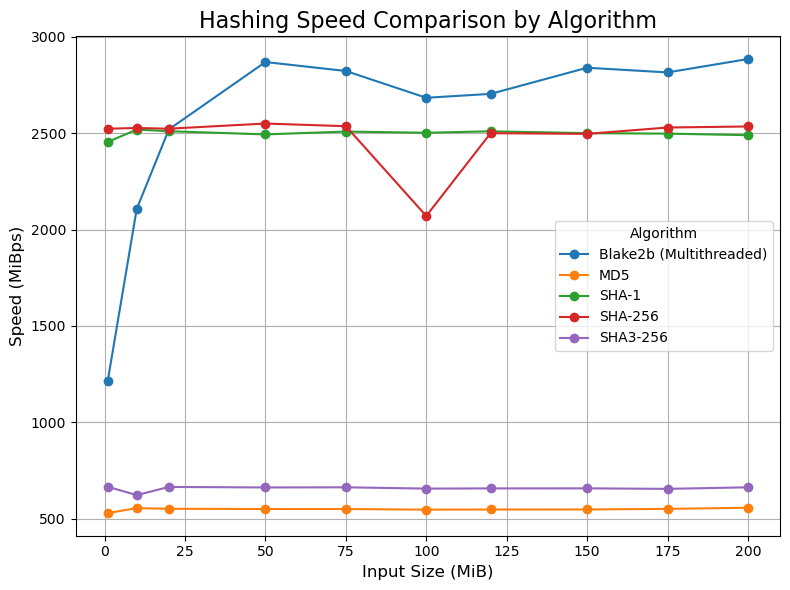

In [60]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the results from the DataFrame (if not already loaded)
df = pd.read_csv("hashing_speed_results_mibps_multithreaded.csv")

# Group the data by Algorithm and Input Size
grouped = df.groupby(["Algorithm", "Input Size (MiB)"])["Speed (MiBps)"].mean().reset_index()

# Plotting
plt.figure(figsize=(8, 6))

# Iterate over algorithms to plot their respective speed curves
for algo in grouped["Algorithm"].unique():
    algo_data = grouped[grouped["Algorithm"] == algo]
    plt.plot(
        algo_data["Input Size (MiB)"],
        algo_data["Speed (MiBps)"],
        marker='o',
        label=algo
    )

# Add titles and labels
plt.title("Hashing Speed Comparison by Algorithm", fontsize=16)
plt.xlabel("Input Size (MiB)", fontsize=12)
plt.ylabel("Speed (MiBps)", fontsize=12)
plt.legend(title="Algorithm", fontsize=10)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()
